<a href="https://colab.research.google.com/github/priyabodke41/Regression_capstone_project/blob/main/Regression_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn')
plt.rcParams['axes.titlesize']=25
plt.rcParams['axes.titleweight']='bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['axes.labelsize']=20
plt.rcParams['font.weight']='bold'
plt.rcParams['legend.fontsize']=15
plt.rcParams['legend.title_fontsize']=15

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
stockdata= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_YesBank_StockPrices (1).csv")
stockdata

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [5]:
stockdata.shape

(185, 5)

In [6]:
stockdata.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [7]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


**We have 185 rows and 4 columns in our dataset with no null values. Here our dependent variable will be Close, and independent variables are - Open, High and Low.**

**Date: It denotes the month and year of the for a particular price.**
**Open: Open means the price at which a stock started trading that month.**
**High: refers to the maximum price that month.**
**Low: refers to the minimum price that month.**
**Close: refers to the final trading price for that month, which we have to predict using regression**

In [8]:
#checking for null values
stockdata.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

No missing values in dataset.

In [9]:
#checking for duplicate values
stockdata.duplicated().sum()

0

No duplicate values in dataset

In [11]:
from datetime import datetime
stockdata['Date'] = stockdata['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [12]:
stockdata.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


**Exploratory Data Analysis**

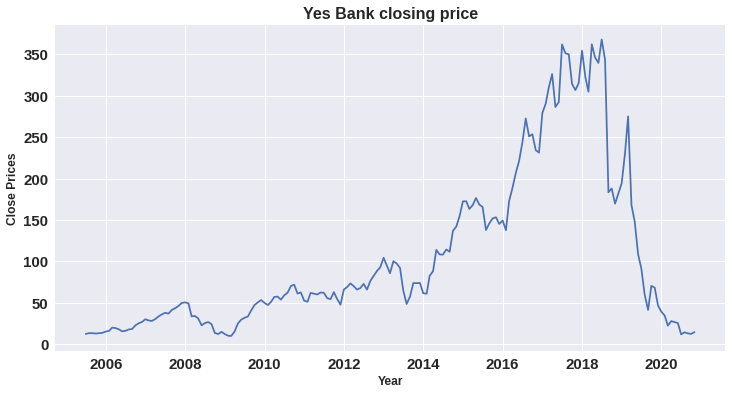

In [14]:
#visualising closing price on months basis
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Close Prices', fontsize=12)
plt.plot(stockdata['Date'], stockdata['Close'])
plt.title('Yes Bank closing price', fontsize=16)
plt.show()

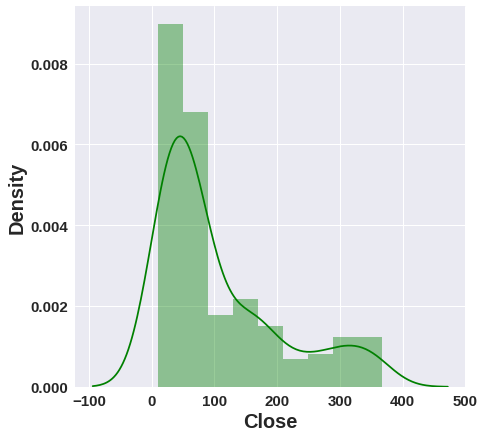

In [39]:
#visualising closing price 
plt.figure(figsize=(7,7))
sns.distplot(stockdata['Close'],color="g")

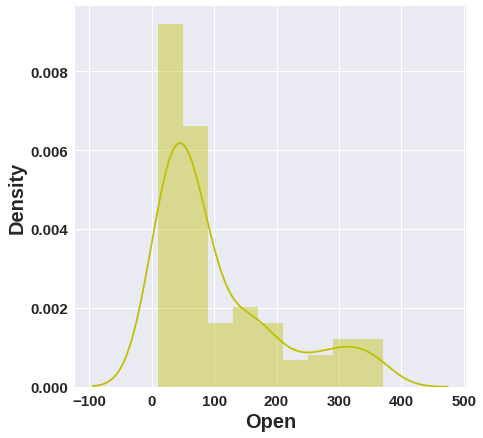

In [35]:
plt.figure(figsize=(7,7))
sns.distplot(stockdata['Open'],color="y")

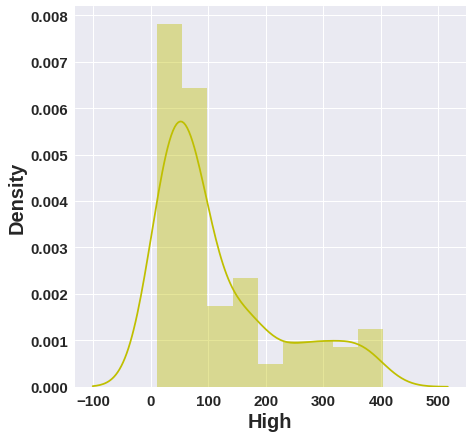

In [36]:
plt.figure(figsize=(7,7))
sns.distplot(stockdata['High'],color="y")

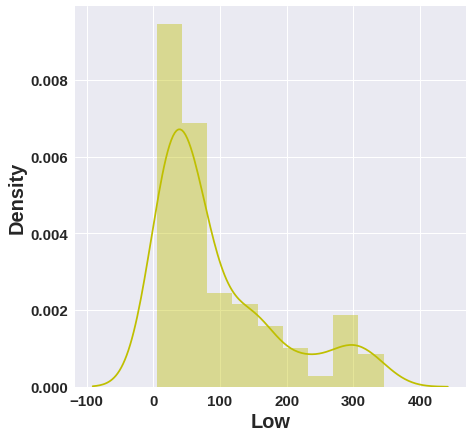

In [40]:
plt.figure(figsize=(7,7))
sns.distplot(stockdata['Low'],color="y")

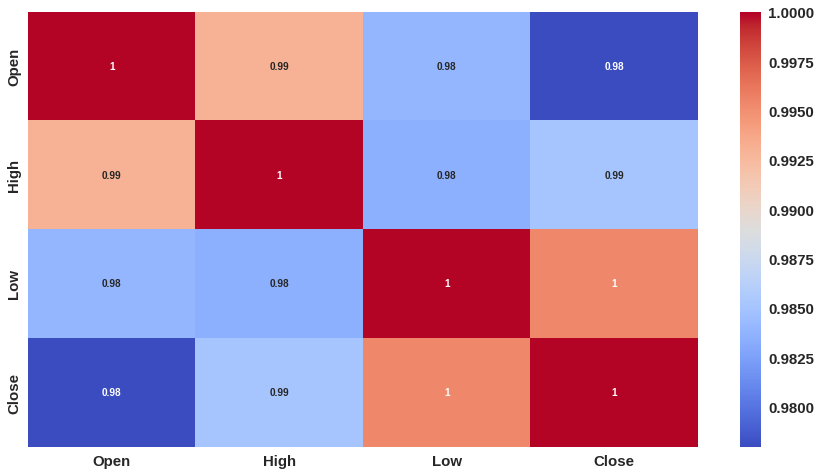

In [24]:
plt.figure(figsize=(15,8))
correlation = stockdata.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')